# ***INPUT DATA DAN PREPROCESSING***

In [ ]:
import pandas as pd
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.shape

(319795, 18)

In [ ]:
# Mengambil data secara acak
num_samples = 5000
data = data.sample(n=num_samples, random_state=42)
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,No,27.63,Yes,No,No,0.0,25.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
270361,No,21.95,No,No,No,0.0,20.0,No,Female,30-34,White,No,Yes,Excellent,6.0,No,No,Yes
219060,No,31.32,Yes,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,6.0,Yes,No,No
24010,No,40.35,No,No,No,30.0,0.0,No,Female,65-69,White,No,No,Good,8.0,No,No,No
181930,No,35.61,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,No,No,Fair,4.0,Yes,No,Yes
24149,Yes,24.63,Yes,No,No,0.0,0.0,No,Female,80 or older,White,Yes,Yes,Very good,8.0,No,No,No
185683,No,41.73,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Very good,7.0,No,No,No
316656,No,16.30,No,No,No,2.0,0.0,No,Female,25-29,Hispanic,No,No,Excellent,8.0,No,No,No
305719,No,21.52,Yes,No,No,30.0,0.0,No,Male,65-69,White,No,No,Good,8.0,No,No,No
56786,No,29.53,Yes,No,No,28.0,30.0,Yes,Male,45-49,Black,No,Yes,Fair,5.0,Yes,No,No


In [ ]:
data.drop(columns = ['Race'], inplace = True)

In [ ]:
# Encoding columns
replacement_dict = {'Yes': 1, 'No': 0}
data['HeartDisease'] = data['HeartDisease'].replace(replacement_dict)

In [ ]:
data_cat = data.select_dtypes('object')
data_cat.nunique().sort_values()

Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
PhysicalActivity     2
Asthma               2
KidneyDisease        2
SkinCancer           2
Diabetic             4
GenHealth            5
AgeCategory         13
dtype: int64

In [ ]:
data_categorical=data_cat.columns
data_categorical

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
!pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), data_categorical)],
    remainder='passthrough')

In [ ]:
X = preprocessor.fit_transform(data.drop(columns = 'HeartDisease'))
Y = data['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

Test_size =0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=Test_size)

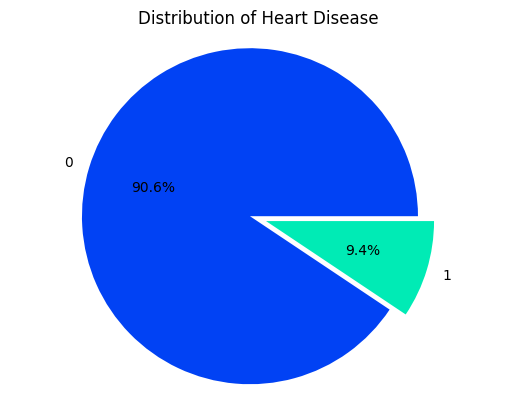

In [ ]:
heart_disease_column = data.HeartDisease.value_counts()

# pie chart for target column
import matplotlib.pyplot as plt
plt.pie(heart_disease_column, labels = heart_disease_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0142F4","#00EBB5"])
plt.title("Distribution of Heart Disease")
plt.axis("equal")
plt.show()

In [ ]:
data.HeartDisease.value_counts()

0    4531
1     469
Name: HeartDisease, dtype: int64

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.5)

X_train, Y_train = under.fit_resample(X_train, Y_train)
X_train, Y_train = over.fit_resample(X_train, Y_train)
Counter(Y_train)

Counter({0: 734, 1: 734})

# ***SUPPORT VECTOR MACHINE* (SVM)**

## Kernel 'linear'

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC(C=0.1, kernel='linear', gamma='auto')
model_SVM

SVC(C=0.1, gamma='auto', kernel='linear')

In [ ]:
model_SVM.fit(X_train, Y_train)
Y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(Y_test, Y_pred_SVM)
conf_matrix

array([[644, 254],
       [ 33,  69]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision= precision_score(Y_test, Y_pred_SVM, average=None)
recall = recall_score(Y_test, Y_pred_SVM, average=None)
accuracy= accuracy_score(Y_test, Y_pred_SVM)


print('precision')
print(precision)
print('recall')
print(recall)
print('accuracy: {:.2f}%'.format(accuracy*100))

precision
[0.95125554 0.21362229]
recall
[0.71714922 0.67647059]
accuracy: 71.30%


## Kernel 'rbf'

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC(C=0.1, kernel='rbf', gamma='auto')
model_SVM

SVC(C=0.1, gamma='auto')

In [ ]:
model_SVM.fit(X_train, Y_train)
Y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(Y_test, Y_pred_SVM)
conf_matrix

array([[653, 245],
       [ 57,  45]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision= precision_score(Y_test, Y_pred_SVM, average=None)
recall = recall_score(Y_test, Y_pred_SVM, average=None)
accuracy= accuracy_score(Y_test, Y_pred_SVM)


print('precision')
print(precision)
print('recall')
print(recall)
print('accuracy: {:.2f}%'.format(accuracy*100))

precision
[0.91971831 0.15517241]
recall
[0.72717149 0.44117647]
accuracy: 69.80%


## Kernel 'sigmoid'

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC(C=0.1, kernel='sigmoid', gamma='auto')
model_SVM

SVC(C=0.1, gamma='auto', kernel='sigmoid')

In [ ]:
model_SVM.fit(X_train, Y_train)
Y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(Y_test, Y_pred_SVM)
conf_matrix

array([[  2, 896],
       [  0, 102]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision= precision_score(Y_test, Y_pred_SVM, average=None)
recall = recall_score(Y_test, Y_pred_SVM, average=None)
accuracy= accuracy_score(Y_test, Y_pred_SVM)


print('precision')
print(precision)
print('recall')
print(recall)
print('accuracy: {:.2f}%'.format(accuracy*100))

precision
[1.         0.10220441]
recall
[0.00222717 1.        ]
accuracy: 10.40%


## Kernel 'poly'

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC(C=0.1, kernel='poly', degree=3, gamma='auto')
model_SVM

SVC(C=0.1, gamma='auto', kernel='poly')

In [ ]:
model_SVM.fit(X_train, Y_train)
Y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(Y_test, Y_pred_SVM)
conf_matrix

array([[646, 252],
       [ 34,  68]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision= precision_score(Y_test, Y_pred_SVM, average=None)
recall = recall_score(Y_test, Y_pred_SVM, average=None)
accuracy= accuracy_score(Y_test, Y_pred_SVM)


print('precision')
print(precision)
print('recall')
print(recall)
print('accuracy: {:.2f}%'.format(accuracy*100))

precision
[0.95   0.2125]
recall
[0.71937639 0.66666667]
accuracy: 71.40%


# ***RANDOM FOREST***

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    MinMaxScaler(),
    RandomForestClassifier(n_estimators=10, random_state=42)
)

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

def train(classifier, X_train, Y_train, X_test, Y_test):

    classifier.fit(X_train,Y_train)
    prediction = classifier.predict(X_test)

def model_evaluation(classifier, X_test, Y_test):

    # Confusion Matrix
    cm = confusion_matrix(Y_test, classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')

    # Classification Report
    print(classification_report(Y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       898
           1       0.25      0.42      0.31       102

    accuracy                           0.81      1000
   macro avg       0.59      0.64      0.60      1000
weighted avg       0.86      0.81      0.83      1000



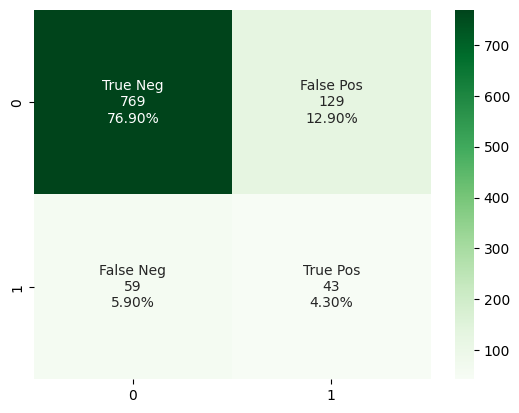

In [ ]:
train(rf_classifier, X_train, Y_train, X_test, Y_test)
model_evaluation(rf_classifier, X_test, Y_test)